# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Caminho do arquivo
arquivo = 'sinasc_RO_2019.csv'

# Carregar o arquivo CSV
df_sinasc = pd.read_csv(arquivo)

# Mostrar as primeiras linhas do DataFrame
print(df_sinasc.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [37]:
# Define os intervalos
bins = [-1, 3, 5, 7, 10]

# Define os rótulos
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Cria uma nova coluna com as categorias
df_sinasc['APGAR5_cat'] = pd.cut(df_sinasc['APGAR5'], bins=bins, labels=labels)

# Exibe as primeiras linhas
print(df_sinasc.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  CONTADOR  \
0      8 a 11 anos         NaN         0.0         0.0  ...         1   
1      8 a 11 anos    999992.0         1.0         0.0  ...         2   
2      8 a 11 anos    513205.0         2.0         0.0  ...         3   
3  12 anos ou mais    231205.0         0.0         0.0  ...         4   
4      8 a 11 anos    999992.0         1.0         0.0  ...         5   

  munResStatus munResTipo               munResNome  munResUf munResLat  \
0        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia -11.93554   
1        ATIVO  

### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

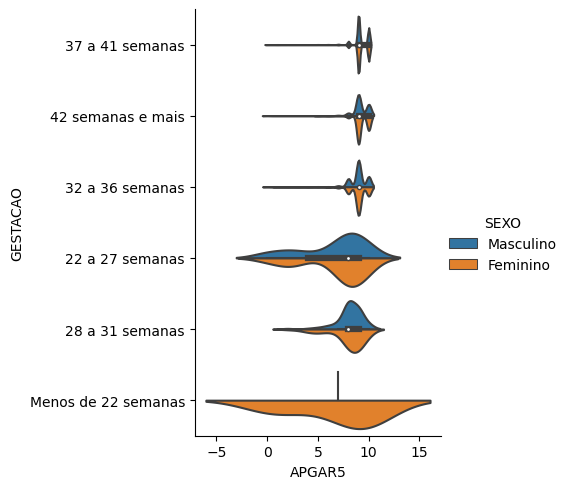

In [38]:
# Criando o catplot
sns.catplot(x="APGAR5", y="GESTACAO", hue="SEXO", kind="violin", split=True, data=df_sinasc)

# Mostrando o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [39]:
# Criando a tabela cruzada
tabela_cruzada = pd.crosstab(df_sinasc['GESTACAO'], df_sinasc['APGAR5'])

# Imprimindo a tabela cruzada
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [40]:
# Criando a tabela cruzada com percentuais de linha
tabela_cruzada_percentuais = pd.crosstab(df_sinasc['GESTACAO'], df_sinasc['APGAR5'], normalize='index')

# Multiplica por 100 para obter os valores em percentagem
tabela_cruzada_percentuais *= 100

# Imprimindo a tabela cruzada com percentuais
print(tabela_cruzada_percentuais)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

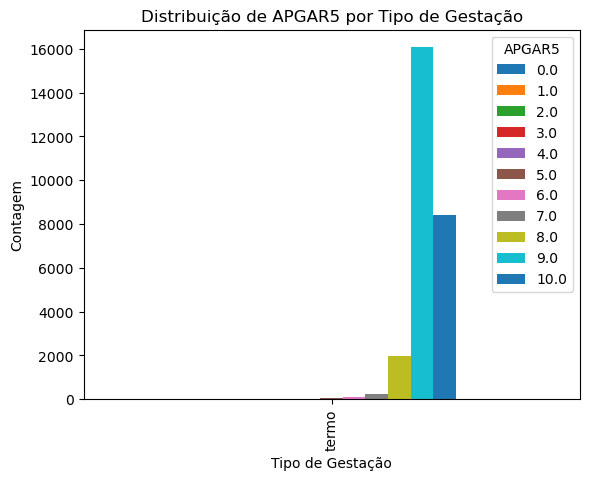

In [41]:
# Converta a coluna 'GESTACAO' para um tipo numérico
df_sinasc['GESTACAO'] = pd.to_numeric(df_sinasc['GESTACAO'], errors='coerce')

# Categorize 'GESTACAO' em 'prematuro' e 'termo'
df_sinasc['GESTACAO_CATEG'] = np.where(df_sinasc['GESTACAO'] < 37, 'prematuro', 'termo')

# Categorize 'GESTACAO' em 'prematuro' e 'termo'
df_sinasc['GESTACAO_CATEG'] = np.where(df_sinasc['GESTACAO'] < 37, 'prematuro', 'termo')

# Crie a tabela cruzada
tabela_cruzada = pd.crosstab(df_sinasc['GESTACAO_CATEG'], df_sinasc['APGAR5'])

# Crie o gráfico de barras agrupado
tabela_cruzada.plot(kind='bar', stacked=False)

# Adicione um título e rótulos dos eixos
plt.title('Distribuição de APGAR5 por Tipo de Gestação')
plt.xlabel('Tipo de Gestação')
plt.ylabel('Contagem')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(0.5, 1.0, 'Distribuição de Peso por APGAR5')

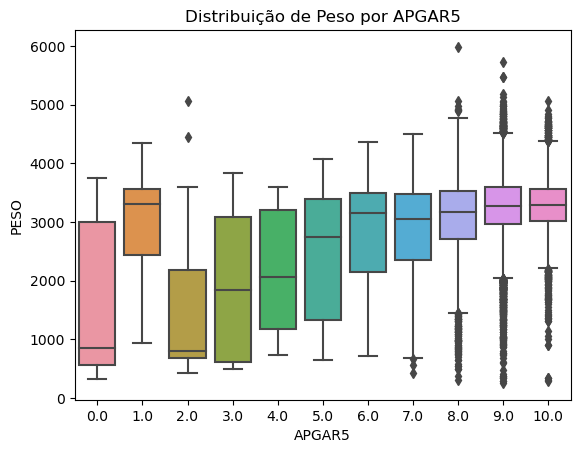

In [42]:
# Este gráfico fornece uma visualização clara da mediana, quartis e outliers da distribuição de peso para cada categoria de APGAR5.

sns.boxplot(x='APGAR5', y='PESO', data=df_sinasc)
plt.title('Distribuição de Peso por APGAR5')
#plt.show()

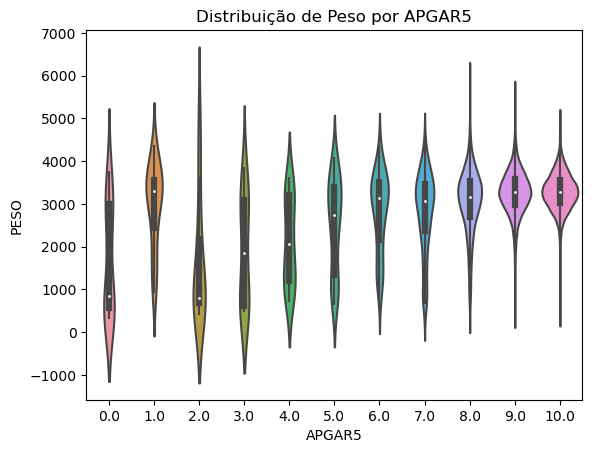

In [43]:
# Este é semelhante a um boxplot, mas também fornece a densidade estimada da distribuição de peso para cada categoria de APGAR5

sns.violinplot(x='APGAR5', y='PESO', data=df_sinasc)
plt.title('Distribuição de Peso por APGAR5')
plt.show()